### Image Analysis

In this notebook, we'll learn about opening and analyzing images in Python using Jupyter Notebooks. We'll start by exploring how images are stored in arrays, and how to manipualte them. Then, we'll add color filters and explain how we can use these tools as pre-processing for image classification models.

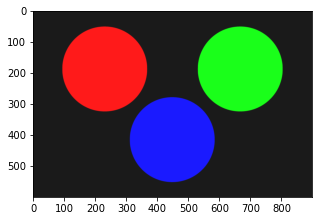

In [1]:
### We'll start by importing packages. In addition to the usual numpy and matplotlib libraries,
### we'll use the imageio library to read and visualize images. Although the library is nice for visualizations,
### we'll never explictly ask for imageio functions or attributes in programming assignments or exams.

### The picture we'll be working has 3 circles: red, green, and blue. You can view it by running this cell.

import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow, imread
%matplotlib inline
pic = imageio.imread('rgb.jpg')
plt.figure(figsize = (5,5))
plt.imshow(pic)
plt.show()

In [2]:
### Images in python are stored as matrices. 
### The total size of the image is given by size = height x weight x 3
### The third dimension corresponds to (red, green, blue) pixel values.
### Each (red, green, blue) value ranges from 0 to 255, indicating the intensity of that color.

### In the mesh below, you can imagine the height correpsonding to the intensity of each color.
### Following this analogy, three of the these mesh grids (one per color) correspond to a single image.

print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Height {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

#### Check propertieriness and use alternate image if needed.
### OR ping kelley. Not sure on images.

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (600, 900, 4)
Image Height 600
Image Width 900
Dimension of Image 3


![mesh](mesh.jpg)

In [3]:
### We call the three dimensional (red, green, blue) values) the 'rgb' value.
### You can see the maximum and minimum rgb values below:

print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 2160000
Maximum RGB value in this image 255
Minimum RGB value in this image 26


In [4]:
### Let's look at a specfic pixel located at Row : 100 ; Column : 150  
### From the rgb values, we know this cell will be predominantly red.

print('Value of only R channel {}'.format(pic[ 100, 150, 0]))
print('Value of only G channel {}'.format(pic[ 100, 150, 1]))
print('Value of only B channel {}'.format(pic[ 100, 150, 2]))

Value of only R channel 255
Value of only G channel 26
Value of only B channel 26


<Figure size 640x480 with 0 Axes>

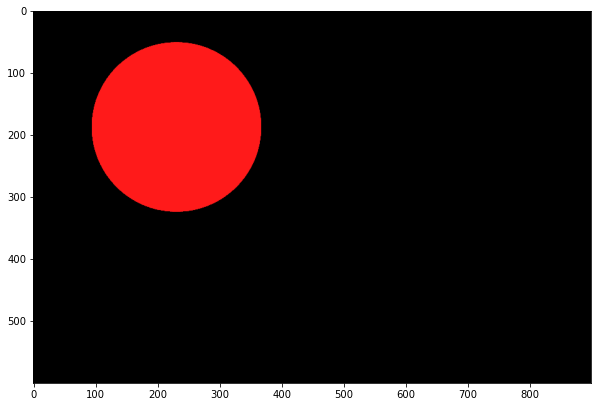

In [5]:
### This cell filters the image to show only the cells with predominantly red values.

red_filtered = (pic[:,:,0] > 150) & (pic[:,:,1] < 50) & (pic[:,:,2] < 50)
plt.figure(num=None, figsize=(8, 6), dpi=80);
pic_new = pic.copy()
pic_new[:, :, 0] = pic_new[:, :, 0] * red_filtered
pic_new[:, :, 1] = pic_new[:, :, 1] * red_filtered
pic_new[:, :, 2] = pic_new[:, :, 2] * red_filtered
plt.figure(figsize = (10,10));
plt.imshow(pic_new);

<Figure size 640x480 with 0 Axes>

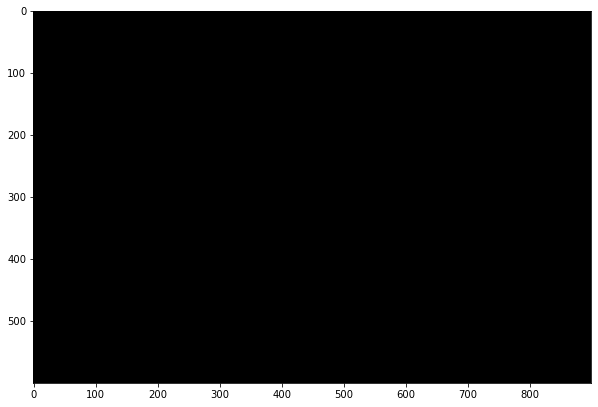

In [6]:
### Try changing the filter values. Can you figure out how to isolate the green and blue circles?

### Work Here

filtered = (pic[:,:,0] < 0) & (pic[:,:,1] > 50) & (pic[:,:,2] < 0)

### End Work


plt.figure(num=None, figsize=(8, 6), dpi=80);
pic_new = pic.copy()
pic_new[:, :, 0] = pic_new[:, :, 0] * filtered
pic_new[:, :, 1] = pic_new[:, :, 1] * filtered
pic_new[:, :, 2] = pic_new[:, :, 2] * filtered
plt.figure(figsize = (10,10));
plt.imshow(pic_new);

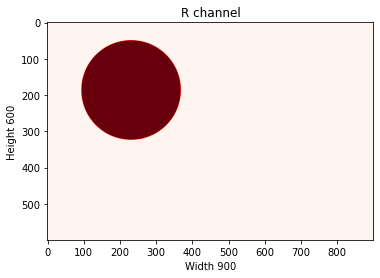

In [7]:
### This shows the red channel of the 'rgb' values.

plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 0], cmap = 'Reds')
plt.show()

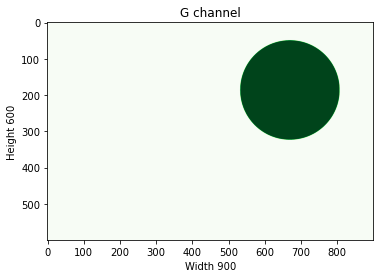

In [8]:
### This shows the green channel of the 'rgb' values.

plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1], cmap = 'Greens') 
plt.show()

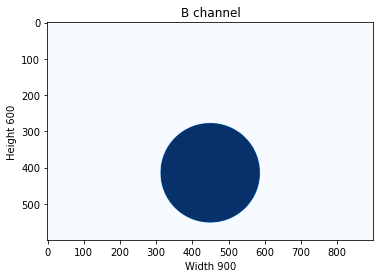

In [9]:
### This shows the blue channel of the 'rgb' values.

plt.title('B channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2], cmap = 'Blues') 
plt.show()

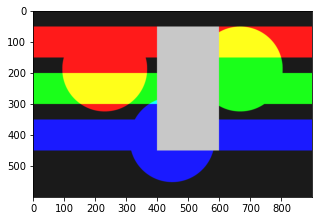

In [10]:
### We can also insert random colors by subsetting into the image array and changing specific values.

pic[50:150 , : , 0] = 255 
pic[200:300 , : , 1] = 255
pic[350:450 , : , 2] = 255
pic[ 50:450 , 400:600 , [0,1,2] ] = 200  
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

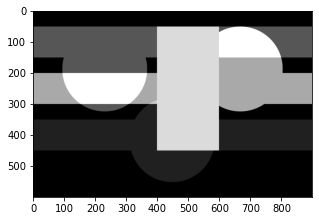

In [11]:
### This function converts the image to grayscale. You're welcome to check out the computations involved,
### but it's ok to skip it for now.

gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])
gray = gray(pic)
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

In [ ]:
### Load one of many images
### plug in number of components
### Change it and run the cell

### We can use singular value decomposition to explore how information is 
### retained by the most dominant axes of the photo.
### SVD can be used to compress images while retain its most important parts.
### By decreasing the number of components, the image becomes increasinging blurry.  

from numpy.linalg import svd


### Enter the number of components and pick an image to load in
### Image choices are 'landscape.jpg', 'flowers.jpg', 'mountains.jpg', 'beach.jpg', 'ocean.jpg'
components = 100
img = imageio.imread('landscape.jpg')

### End work here


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = rgb2gray(img)   
U, S, V = np.linalg.svd(img)

print("Shape of U matrix", U.shape)
print("Shape of S matrix", S.shape)
print("Shape of V matrix", V.shape)

plt.figure(figsize = (8, 4))
low_rank = U[:, :components] @ np.diag(S[:components]) @ V[:components, :]
plt.imshow(low_rank, cmap = 'gray')

(664, 664) (664,) (1601, 1601)


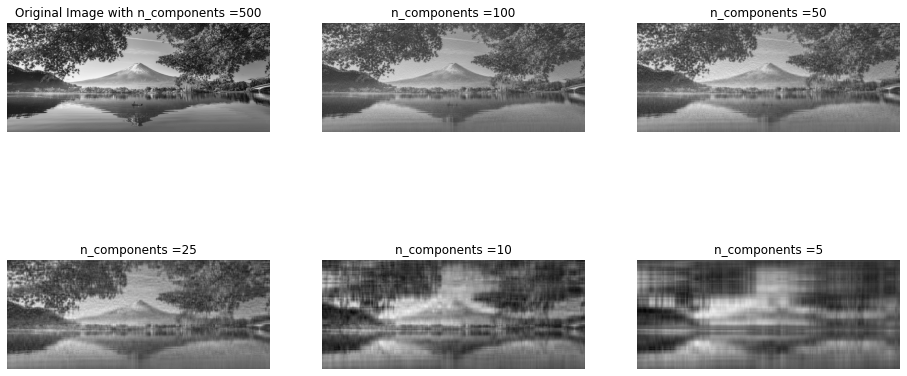

In [95]:
### This loop is an example of how decreasing the number of components makes the image increasingly blurry.

img = imageio.imread('landscape.jpg')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = rgb2gray(img)   

U, S, V = np.linalg.svd(img)

print("Shape of U matrix", U.shape)
print("Shape of S matrix", S.shape)
print("Shape of V matrix", V.shape)

comps = [500, 100, 50, 25, 10, 5, 3]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))